In [ ]:
#Gotta run the first time
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install glob
!pip install ffmpeg-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement glob (from versions: none)
ERROR: No matching distribution found for glob
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import ffmpeg
import sys
import plotly.express as px
import numpy as np
import seaborn as sns
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
from pprint import pprint # for printing Python dictionaries in a human-readable way
import glob
import statistics
import re
import os 
import cv2

In [ ]:
directories = glob.glob("/content/drive/MyDrive/tegn/common_tegn/*/*")
print(directories)

['/content/drive/MyDrive/tegn/common_tegn/laks/laks2.mp4', '/content/drive/MyDrive/tegn/common_tegn/laks/laks1.mp4', '/content/drive/MyDrive/tegn/common_tegn/laks/laks2_low_res.mp4', '/content/drive/MyDrive/tegn/common_tegn/laks/laks1_low_res.mp4', '/content/drive/MyDrive/tegn/common_tegn/laks/laks2_25fps.mp4', '/content/drive/MyDrive/tegn/common_tegn/laks/laks1_25fps.mp4', '/content/drive/MyDrive/tegn/common_tegn/dufte/dufte2.mp4', '/content/drive/MyDrive/tegn/common_tegn/dufte/dufte1.mp4', '/content/drive/MyDrive/tegn/common_tegn/dufte/dufte2_low_res.mp4', '/content/drive/MyDrive/tegn/common_tegn/dufte/dufte1_low_res.mp4', '/content/drive/MyDrive/tegn/common_tegn/dufte/dufte2_25fps.mp4', '/content/drive/MyDrive/tegn/common_tegn/dufte/dufte1_25fps.mp4', '/content/drive/MyDrive/tegn/common_tegn/dukke/dukke2.mp4', '/content/drive/MyDrive/tegn/common_tegn/dukke/dukke1.mp4', '/content/drive/MyDrive/tegn/common_tegn/dukke/dukke2_low_res.mp4', '/content/drive/MyDrive/tegn/common_tegn/dukke/

In [ ]:
metadata_dicts = []
file_names = []

for i in directories:
  tmp = ffmpeg.probe(i)["streams"]
  metadata_dicts.append(tmp[0])
  file_names.append(i)

In [ ]:
durations = []
widths = []
heights = []
framerate = []
bitrate = []
frames_amount = []

for i in metadata_dicts:
  widths.append(i.get("width"))
  heights.append(i.get("height"))
  durations.append(i.get("duration"))
  framerate.append(i.get("avg_frame_rate"))
  bitrate.append(i.get("bit_rate"))
  frames_amount.append(i.get("nb_frames"))

In [ ]:
npwidths = np.asarray(widths)
npheights = np.asarray(heights)
npdur = np.asarray(durations)
npframerate = np.asarray(framerate)
npbitrate = np.asarray(bitrate)
npframes = np.asarray(frames_amount)

combined_arr = np.vstack((np.asarray(file_names), npheights, npwidths, npdur, npframerate, npbitrate, npframes)).T

df = pd.DataFrame(combined_arr, columns = ['path','height','width','duration','framerate', 'bitrate', 'frame_amount'])
df['file_name'] = df['path'].astype(str).str.extract(r'([^/]+)$')

df['height'] = df['height'].astype(int)
df['width'] = df['width'].astype(int)
df['duration'] = df['duration'].astype(float)
df['bitrate'] = df['bitrate'].astype(int)
df['framerate'] = df['framerate'].astype(str).str.extract(r'^(\d+)').astype(int)
df['frame_amount'] = df['frame_amount'].astype(int)

df = df[['file_name', 'path','height','width','duration','framerate', 'bitrate', 'frame_amount']]

In [ ]:
lowres_df = df[df['file_name'].str.contains('_low_res')]
lowfps_df = df[df['file_name'].str.contains('_25fps')]
df = df[~df['file_name'].str.contains('_low_res')]
df = df[~df['file_name'].str.contains('_25fps')]

# Analysis of original Dataset

In [ ]:
def general_video_stats(df):
  print("Amount of Videos in Dataset: " + str(len(df['file_name'])))
  print("Shortest Video: " + str(min(df['duration'])))
  print("Longest Video: " + str(max(df['duration'])))
  print("Average Video Length: " + str(df['duration'].mean()))
  print("Least frames: " + str(min(df['frame_amount'])))
  print("Most frames: " + str(max(df['frame_amount'])))
  # All of our video resolutions
  print(pd.unique(df['framerate']))
  print(df.groupby(['width','height']).count().reset_index())
  sns.set_theme(style="whitegrid")
  sns.countplot(x=df["framerate"])

def bitrate_stats(df):
  # Bitrate stats
  print("Smallest bitrate: " + str(min(df['bitrate'])))
  print("Highest bitrate: " + str(max(df['bitrate'])))
  print("Average bitrate: " + str(df['bitrate'].mean()))
  print("Variance of bitrate: " + str(df['bitrate'].var()))

  px.histogram(df, x="bitrate")

Amount of Videos in Dataset: 350
Shortest Video: 1.0
Longest Video: 4.68
Average Video Length: 2.4147847142857146
Least frames: 25
Most frames: 24000
[   25    50 24000  2997]
   width  height  file_name  path  duration  framerate  bitrate  frame_amount
0    640     480         67    67        67         67       67            67
1    720     540        205   205       205        205      205           205
2    960     720         30    30        30         30       30            30
3   1440    1080         48    48        48         48       48            48


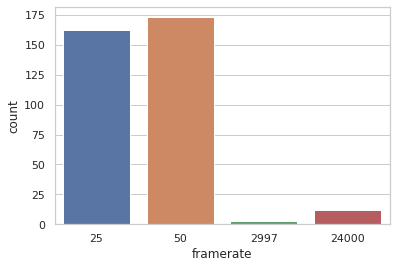

In [ ]:
general_video_stats(df)

In [ ]:
px.histogram(df, x="frame_amount")

# Analysis of Lowered FPS Dataset

Amount of Videos in Dataset: 350
Shortest Video: 1.0
Longest Video: 4.68
Average Video Length: 2.4162285714285714
Least frames: 25
Most frames: 117
[25]
   width  height  file_name  path  duration  framerate  bitrate  frame_amount
0    640     480         67    67        67         67       67            67
1    720     540        205   205       205        205      205           205
2    960     720         30    30        30         30       30            30
3   1440    1080         48    48        48         48       48            48


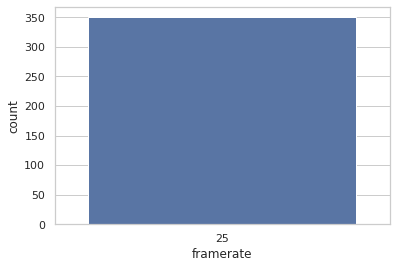

In [ ]:
general_video_stats(lowfps_df)

In [ ]:
px.histogram(lowfps_df, x="frame_amount")

In [ ]:
lowfps_df.loc[lowfps_df['frame_amount'] > 70]

,file_name,path,height,width,duration,framerate,bitrate,frame_amount
29,mave1_25fps.mp4,/content/drive/MyDrive/tegn/common_tegn/mave/m...,540,720,2.88,25,363005,72
35,musik1_25fps.mp4,/content/drive/MyDrive/tegn/common_tegn/musik/...,540,720,2.88,25,400258,72
58,natur2_25fps.mp4,/content/drive/MyDrive/tegn/common_tegn/natur/...,1080,1440,3.80,25,931978,95
59,natur1_25fps.mp4,/content/drive/MyDrive/tegn/common_tegn/natur/...,540,720,2.84,25,512256,71
64,makedonien2_25fps.mp4,/content/drive/MyDrive/tegn/common_tegn/makedo...,480,640,3.24,25,499659,81
...,...,...,...,...,...,...,...,...
1024,udenom2_25fps.mp4,/content/drive/MyDrive/tegn/common_tegn/udenom...,480,640,3.64,25,526191,91
1030,opvask2_25fps.mp4,/content/drive/MyDrive/tegn/common_tegn/opvask...,480,640,4.44,25,426605,111
1031,opvask1_25fps.mp4,/content/drive/MyDrive/tegn/common_tegn/opvask...,540,720,3.00,25,395520,75
1036,kultur2_25fps.mp4,/content/drive/MyDrive/tegn/common_tegn/kultur...,1080,1440,3.44,25,914139,86


In [ ]:
for keys, value in metadata_dicts[0].items():
   print(keys)

index
codec_name
codec_long_name
profile
codec_type
codec_time_base
codec_tag_string
codec_tag
width
height
coded_width
coded_height
has_b_frames
sample_aspect_ratio
display_aspect_ratio
pix_fmt
level
color_range
color_space
color_transfer
color_primaries
chroma_location
refs
is_avc
nal_length_size
r_frame_rate
avg_frame_rate
time_base
start_pts
start_time
duration_ts
duration
bit_rate
bits_per_raw_sample
nb_frames
disposition
tags


In [ ]:
pprint(ffmpeg.probe("/content/drive/MyDrive/tegn/1aborter.mp4")["streams"])

[{'avg_frame_rate': '25/1',
  'bit_rate': '1046469',
  'bits_per_raw_sample': '8',
  'chroma_location': 'left',
  'codec_long_name': 'H.264 / AVC / MPEG-4 AVC / MPEG-4 part 10',
  'codec_name': 'h264',
  'codec_tag': '0x31637661',
  'codec_tag_string': 'avc1',
  'codec_time_base': '1/50',
  'codec_type': 'video',
  'coded_height': 1088,
  'coded_width': 1440,
  'color_primaries': 'bt709',
  'color_range': 'tv',
  'color_space': 'bt709',
  'color_transfer': 'bt709',
  'disposition': {'attached_pic': 0,
                  'clean_effects': 0,
                  'comment': 0,
                  'default': 1,
                  'dub': 0,
                  'forced': 0,
                  'hearing_impaired': 0,
                  'karaoke': 0,
                  'lyrics': 0,
                  'original': 0,
                  'timed_thumbnails': 0,
                  'visual_impaired': 0},
  'duration': '1.720000',
  'duration_ts': 43000,
  'has_b_frames': 1,
  'height': 1080,
  'index': 0,
  'is_avc'

# Takes path and renames output filename with "extension"

In [ ]:
def newname(path, extension):
  string = path
  parts = string.split(".")
  parts[-2] += extension
  new_string = ".".join(parts)
  return new_string

# Code that resizes all Videos to min resolution

In [ ]:
'''
for index, row in df.iterrows():
  cap = cv2.VideoCapture(row['path'])
  
  fourcc = cv2.VideoWriter_fourcc(*'XVID')
  out = cv2.VideoWriter(newname(row['path'], "_low_res"),fourcc, row['framerate'], (min(df['width']),min(df['height'])))
  
  while True:
      ret, frame = cap.read()
      if ret == True:
          b = cv2.resize(frame,(min(df['width']),min(df['height'])),fx=0,fy=0, interpolation = cv2.INTER_CUBIC)
          out.write(b)
      else:
          break
      
  cap.release()
  out.release()
  cv2.destroyAllWindows()
  '''

# Lowering resolutions of all videoes = 50 FPS to 25 and outputting it

In [ ]:
highfps_df = df.loc[df['framerate'] == 50]

for index, row in df.iterrows():
  inp = row['path']
  outp = newname(inp, "_25fps")
  ffmpeg.input(inp).filter_('fps', fps=25, round='up').output(outp).run()